<a href="https://colab.research.google.com/github/t0e/ml_notebooks/blob/main/Waste_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import Path
from glob2 import glob
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np
import os
import zipfile as zf
import shutil
import re
import seaborn as sns
import _pickle as pickle
import dill
import weakref

In [19]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [21]:
print(os.listdir(os.path.join(os.getcwd(),"drive/My Drive")))

['@alina_nikitina', 'Nice porn', '柚木', 'Cosplayer', 'DY11-过期米线线喵 - Classroom', 'DY17-Azami - Tifa Lockhart (Final Fantasy) Reverse Bunny', 'DY16-Arknights Skyfire （Shika小鹿鹿）', 'Girls', 'DVA', 'Getting started.pdf', 'KK.zip', 'Proforma Invoice 13.5.2017.gdoc', 'Commercial Invoice 1.2.2018.docx', 'Commercial Invoice 1.2.2018 (2).gdoc', 'Commercial Invoice 1.2.2018 (1).gdoc', 'Untitled document (2).gdoc', 'Pros and Cons of Technology.gdoc', 'Untitled document (1).gdoc', 'People Migration from countryside to cities becomes a worldwide problem.gdoc', 'Reading Tasks.gdoc', 'Rubbish.gdoc', 'Vocab.gdoc', 'Grammer.gdoc', 'Vocabulary.gdoc', 'Pie chart.gdoc', 'Thet Mg MG Toe - Personal Statement - BTEC International Student of the Year Award 2018_REVISED.docx', 'BTEC.gdoc', 'Thet Mg MG Toe - Personal Statement - BTEC International Student of the Year Award 2018_REVISED1.docx', 'Proforma Invoice 20.7.2017.gdoc', 'Letter Head.gdoc', 'Invoice & Packing List 6.9.2018.gdoc', 'Commercial Invoice 1.2.20

In [16]:
waste_types = ['cardboard','glass','metal','plastic','paper','trash']

In [15]:
path = Path(os.getcwd())/"drive/My Drive/data1"
path

PosixPath('/content/drive/My Drive/data1')

In [17]:
tfms = get_transforms(do_flip=True,flip_vert=True)
data = ImageDataBunch.from_folder(path,test="test",ds_tfms=tfms,bs=16)

OSError: ignored

In [15]:
data

ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
plastic,plastic,plastic,plastic,plastic
Path: /content/drive/My Drive/data1;

Valid: LabelList (629 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
metal,metal,metal,metal,metal
Path: /content/drive/My Drive/data1;

Test: LabelList (636 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /content/drive/My Drive/data1

In [16]:
print(data.classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


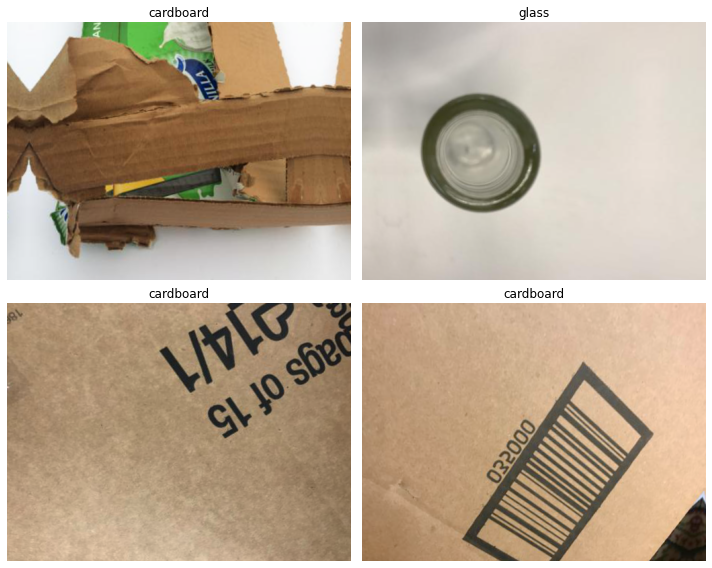

In [18]:
data.show_batch(rows=2,figsize=(10,8))

In [19]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [20]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [21]:
learn.lr_find(start_lr=1e-6,end_lr=1e1)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


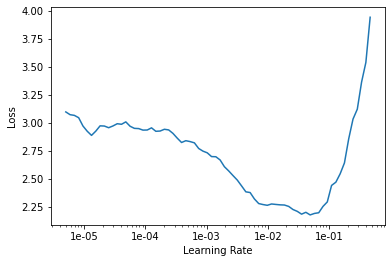

In [22]:
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(3,max_lr=5.13e-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.388983,1.179996,0.314785,31:32
1,1.085682,0.930604,0.244833,31:29
2,0.684359,0.715734,0.195548,31:27


In [4]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

NameError: ignored

In [1]:
interp.plot_top_losses(9, figsize=(15,11))

NameError: ignored

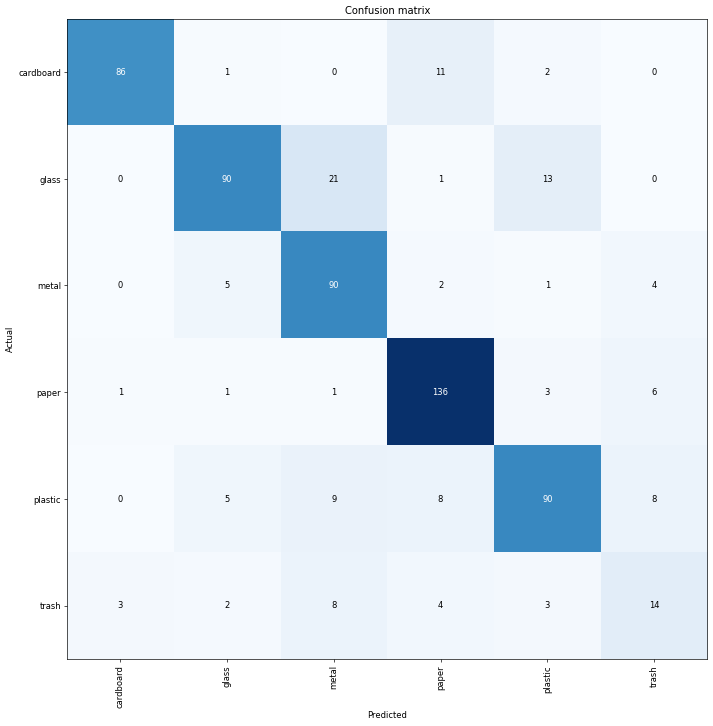

In [ ]:
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('glass', 'metal', 21),
 ('glass', 'plastic', 13),
 ('cardboard', 'paper', 11),
 ('plastic', 'metal', 9),
 ('plastic', 'paper', 8),
 ('plastic', 'trash', 8),
 ('trash', 'metal', 8),
 ('paper', 'trash', 6),
 ('metal', 'glass', 5),
 ('plastic', 'glass', 5),
 ('metal', 'trash', 4),
 ('trash', 'paper', 4),
 ('paper', 'plastic', 3),
 ('trash', 'cardboard', 3),
 ('trash', 'plastic', 3),
 ('cardboard', 'plastic', 2),
 ('metal', 'paper', 2),
 ('trash', 'glass', 2)]

In [ ]:
preds = learn.get_preds(ds_type=DatasetType.Test)
#print(preds)

[tensor([[6.1311e-05, 3.7004e-04, 1.8836e-04, 1.5219e-02, 9.8410e-01, 5.7795e-05],
        [7.2120e-05, 1.2958e-03, 1.0924e-02, 2.2944e-05, 9.8759e-01, 9.6965e-05],
        [4.6262e-06, 1.0711e-02, 3.0964e-02, 3.3614e-05, 9.5702e-01, 1.2640e-03],
        ...,
        [1.5503e-05, 9.8114e-03, 9.9010e-01, 3.7218e-05, 1.8744e-05, 1.4367e-05],
        [1.4086e-06, 1.4808e-03, 9.9848e-01, 2.9529e-08, 1.1777e-05, 2.6177e-05],
        [2.8799e-06, 1.3751e-04, 9.9977e-01, 3.2794e-05, 1.1391e-05, 4.2217e-05]]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0

In [ ]:
#print(preds[0].shape)
#preds[0]

In [ ]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [ ]:
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [ ]:
yhat = []
for max_idx in max_idxs:
    yhat.append(data.classes[max_idx])
yhat

['plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'glass',
 'plastic',
 'glass',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'glass',
 'plastic',
 'plastic',
 'glass',
 'plastic',
 'plastic',
 'metal',
 'glass',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'metal',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'metal',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'metal',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'metal',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'plastic',
 'metal',
 'plastic',
 'plastic',
 'plastic',
 '

In [ ]:
learn.data.test_ds.items

array([PosixPath('/content/gdrive/My Drive/data1/test/plastic/plastic245.jpg'),
       PosixPath('/content/gdrive/My Drive/data1/test/plastic/plastic248.jpg'),
       PosixPath('/content/gdrive/My Drive/data1/test/plastic/plastic242.jpg'),
       PosixPath('/content/gdrive/My Drive/data1/test/plastic/plastic244.jpg'), ...,
       PosixPath('/content/gdrive/My Drive/data1/test/metal/metal294.jpg'),
       PosixPath('/content/gdrive/My Drive/data1/test/metal/metal287.jpg'),
       PosixPath('/content/gdrive/My Drive/data1/test/metal/metal307.jpg'),
       PosixPath('/content/gdrive/My Drive/data1/test/metal/metal301.jpg')], dtype=object)

In [ ]:
y = []
z=[]
t=[]

## convert POSIX paths to string first
for label_path in data.test_ds.items:
    y.append(str(label_path))
    
## then extract waste type from file path
#"^/.*[0-9]$"
for i in range(len(y)):
    z.append( y[i].split('test/'))
    t=z[i][1].split('/')
    y[i]=t[0]
    #y[i] = pattern.search(y[i])

In [ ]:
## predicted values
print(yhat)
## actual values
print(y)

['plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'glass', 'plastic', 'glass', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'glass', 'plastic', 'plastic', 'glass', 'plastic', 'plastic', 'metal', 'glass', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'metal', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'metal', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'metal', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'metal', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'metal', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic', 'plastic'

In [ ]:
cm = confusion_matrix(y,yhat)
print(cm)

[[ 88   1   2  11   1   0]
 [  0  81  24   2  19   0]
 [  0   3  97   1   0   2]
 [  0   0   1 146   0   2]
 [  0   7   6   1 107   0]
 [  0   1   0   9   0  24]]


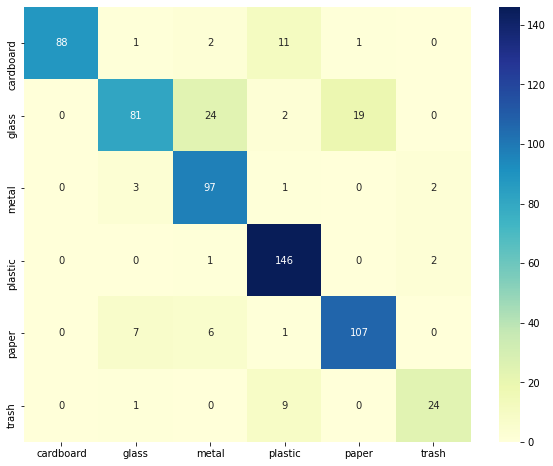

In [ ]:
df_cm = pd.DataFrame(cm,waste_types,waste_types)

plt.figure(figsize=(10,8))
sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")

In [ ]:
correct = 0
print(len(cm))
for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]

6


In [ ]:
accuracy = correct/sum(sum(cm))
accuracy

0.8537735849056604

In [ ]:
learn.save('data.pkl',return_path=True) #Saving trained model

PosixPath('/content/gdrive/My Drive/data1/models/data.pkl.pth')

In [ ]:
learned = learn.load("data.pkl")  #Loading Saved model

In [ ]:
learned

Learner(data=ImageDataBunch;

Train: LabelList (1262 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
plastic,plastic,plastic,plastic,plastic
Path: /content/gdrive/My Drive/data1;

Valid: LabelList (629 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: CategoryList
metal,metal,metal,metal,metal
Path: /content/gdrive/My Drive/data1;

Test: LabelList (636 items)
x: ImageList
Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512),Image (3, 384, 512)
y: EmptyLabelList
,,,,
Path: /content/gdrive/My Drive/data1, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation